# Project: Oil price prediction using machine learning

This notebook looks at the basic uses of machine learning algorithms to predict the future values in a time series. Here, we have selected to work with oil prices. We can easily apply the thinking to other asset classes. 

The overall layout of the code is as follows: 
1. Read in the CSV data file
2. Plot the data
3. Run some statistical tests on the data
4. Split the data into training and test sets
5. Train the ML algorithm
6. Test the ML algorithm

## Background on Oil
Oil is a very volatile commodity. Its price fluctuates heavily dependent on the news. This is because the fundamentals of oil prices are rarely based on real-time data, instead, it is driven by externalities, making our attempt to forecast it all the more challenging.

### Oil in 2020
In 2020, COVID-19’s repercussions acted as a reminder of how unpredictable and sensitive oil prices are relative to external shocks.

At the beginning of the year, oil prices were soaring because of the OPEC-led supply cuts, U.S. sanctions on multiple major oil exporters, and escalating tensions in Libya.

However, all of that took a major turn when the health of the global economy was put into speculation after COVID-19, and to make matters worse, industry experts believe it is now “virtually impossible” to confidently forecast the price of oil.

What is more confusing is that presidents have been preaching the virtues of cheap oil for decades. Trump tweeted in March that oil prices coming down is great... A month later he tweeted that prices are going up which is "Good (GREAT)" news for everyone. This one tweet causes oil prices to spike by 25%, the biggest one-day gain in recorded history.

Then, on April 9th 2020, there was an historic OPEC deal. The deal was the cut production by 10%. The deal just stemmed the damage that is still being done to the market. Oil and gas producers are still cutting their dividends and capital spending in efforts to protect their balance sheets in the face of escalating financial losses.

### Oil and the economy
The reason we are creating this model is because of how linked the health of the economy is to oil prices, whenever there is a slight deviation from the norm in oil prices, the economy is impacted drastically as evident by the parallel movements on Google Trends. Just type in "Oil Prices" and compare it to "Economy" and you will see a strong correlation. 

## Time Series Analysis
Time series analysis is an insightful way to look at how a certain commodity changes over time, however, we need to go a step further and create a forecasting model using machine learning’s <font color=blue> autoregressive integrated moving average (__ARIMA__) model </font>.

The autoregressive integrated moving average model is a form of regression analysis that predicts future moves by examining the *difference* between the values in the series as opposed to actual values. 
It is the perfect time to implement this algorithm as we don’t expect any more majorly historic deals anytime soon given the recency of the OPEC deal.

<br>

<br>

<br>

# Let's get started

In [1]:
"""======================="""
"""  IMPORTING LIBRARIES  """
"""======================="""
# Import all necassary libraries used throughout
import pandas as pd
pd.set_option('float_format', '{:0.2f}'.format)
import numpy as np
import os
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore")

# Import specific functions
import matplotlib as mpl
from matplotlib import pyplot as plt
fig_width=14
fig_height=4
mpl.rcParams['figure.dpi']= 200
mpl.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
mpl.rcParams.update({'font.size': 10})

"""
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
"""

from statsmodels.tsa.stattools import adfuller
from numpy import log
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima_model import ARIMA

# Hold the current working directory in a variable
pwd = os.getcwd()
print(pwd)

/Users/arslan/Dropbox/cqf/code/python/project_oil_ml


Data Set: 	 (8542, 2)
Data Types:	 date     datetime64[ns]
price           float64
dtype: object


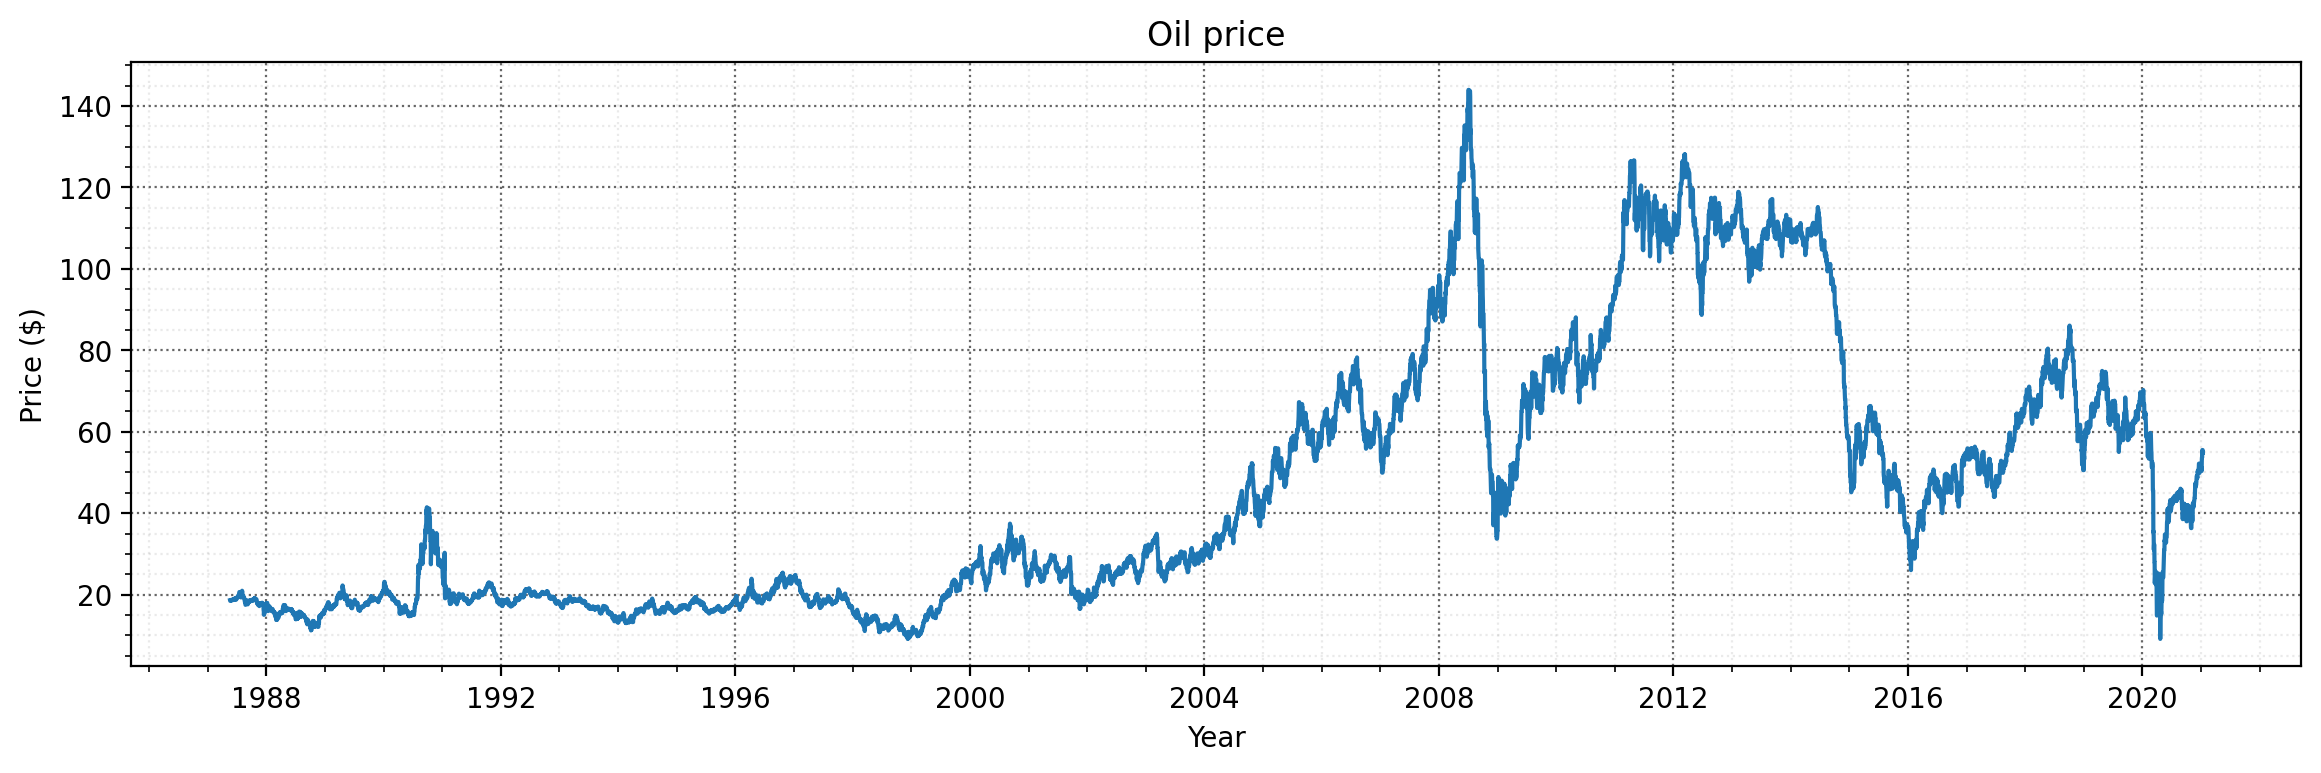

In [2]:
"""======================="""
""" READ THE DATA         """
"""======================="""
## Import the csv file into a pandas DataFrame
df = pd.read_csv( pwd + '/historical_oil_prices.csv')

## Change column names to lowercases 
## for ease when typing
df.columns=['date', 'price']

## Cast the date column to type 'date'
df['date'] = pd.to_datetime(df['date'])
print("Data Set: \t"% df.columns, df.shape)
print("Data Types:\t", df.dtypes)

## Set the index of the table to be the date
df.set_index('date', inplace=True)
df = df.resample('D').ffill().reset_index()

## Check if there is any data missing
if df.isnull().values.any():
    print("Missing data")
    
## Print the last 10 rows of the table just 
## to see everything's halal
#df.tail(10)

"""======================="""
""" PLOT THE DATA         """
"""======================="""
## Now we can plot the data to see some cool patterns
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
plt.figure()
plt.plot(df['date'],df['price'])
plt.title("Oil price")
plt.xlabel("Year")
plt.ylabel("Price ($)")
## Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle=':')
## Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle=':', alpha=0.2)
plt.show()

In [3]:
## Add columns for the year, month and day
df['year']  = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week']  = df['date'].dt.week

## This is super useful for when we want to
## isolate the data for a particular month or
## year. We can even run correlation studies 
## across months to see if a particular month
## is strongly correlated in terms of price 
## movement over the years.
summary = df.groupby("year").price.describe()
summary.head()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1987,226.00,18.53,0.96,15.03,17.93,18.60,19.05,20.95
1988,366.00,14.96,1.47,11.20,14.00,15.16,16.15,17.95
1989,365.00,18.27,1.25,16.05,17.20,18.15,19.18,22.25
1990,365.00,23.70,7.71,14.68,17.05,20.60,30.53,41.45
1991,365.00,20.02,1.91,17.60,18.75,19.63,20.73,30.28


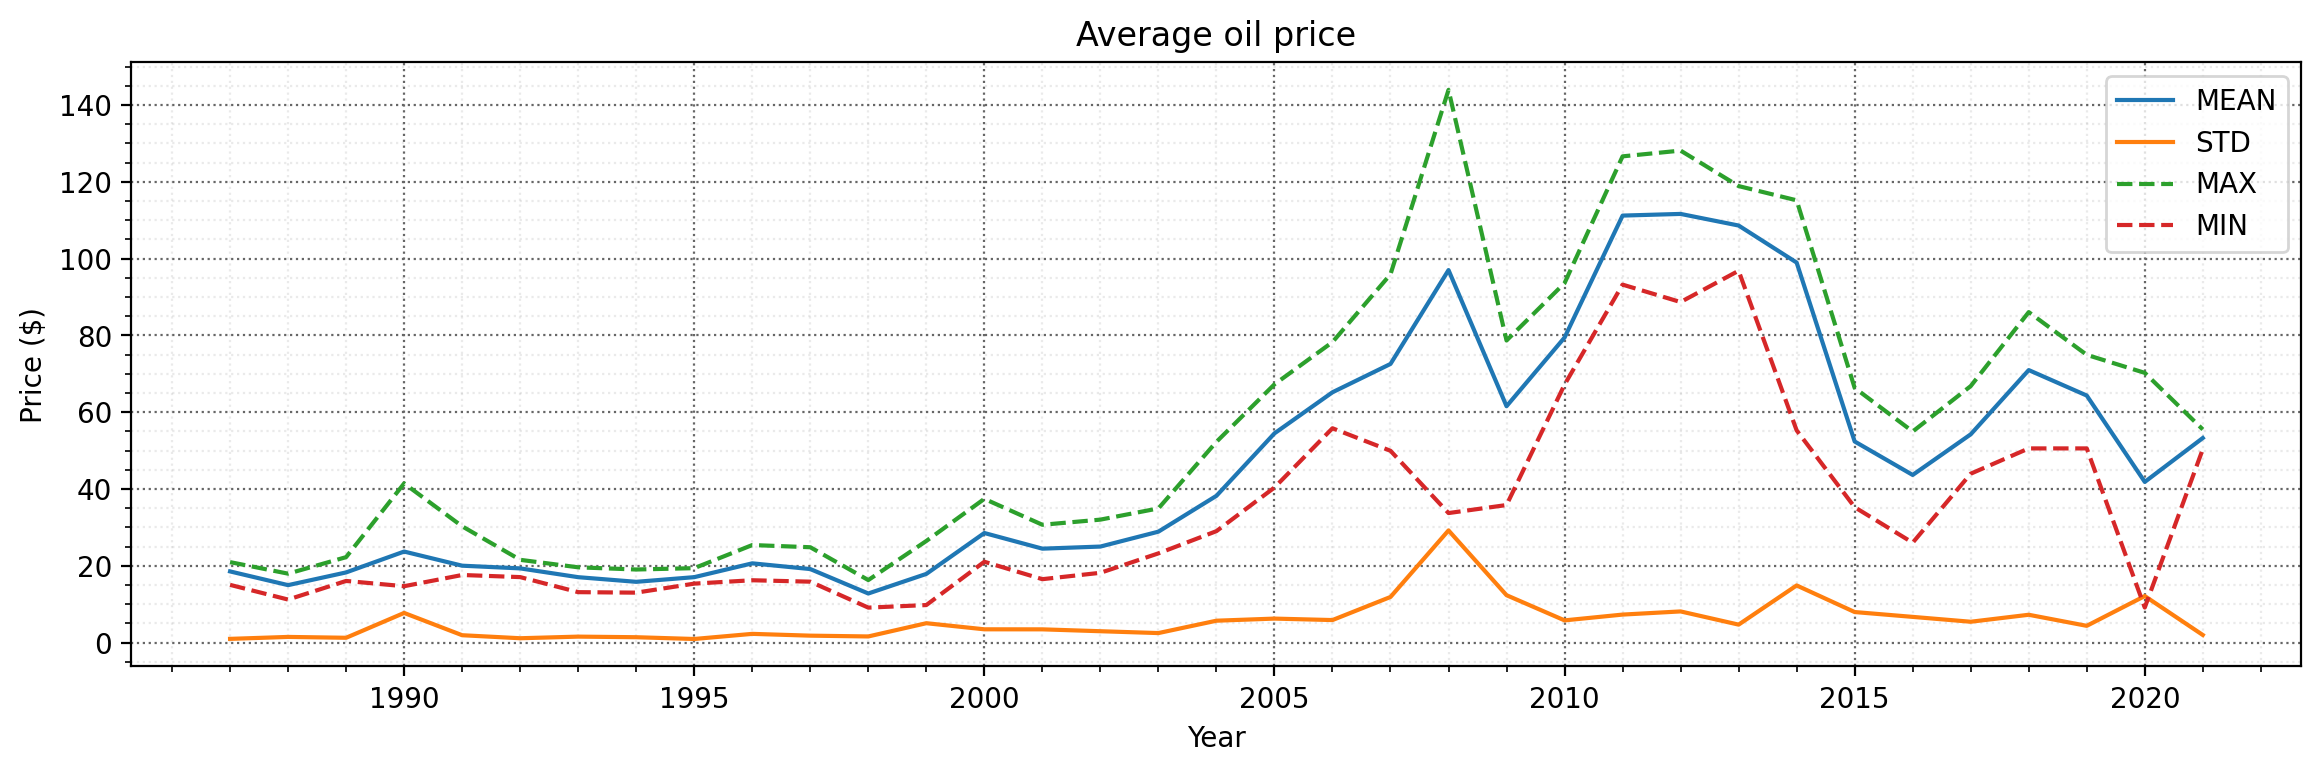

In [4]:
"""======================="""
""" PLOT THE DATA         """
"""======================="""
## Now we can plot the data to see some cool patterns
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
plt.figure()
plt.plot(summary['mean'], label='MEAN')
plt.plot(summary['std'], label='STD')
plt.plot(summary['max'],linestyle='--', label='MAX')
plt.plot(summary['min'],linestyle='--', label='MIN')
plt.title("Average oil price")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.legend(loc='best')
## Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle=':')

## Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle=':', alpha=0.2)

plt.show()

<br>

<br>

<br>

# Statistical tests
We are now going to run some simple statistical tests on the prices. Earlier, we imported a function called `adfuller`. This function is used to find out if a timeseries is stationary or not. Let's quickly go over the basics of stationarity.

Here, we will cover:
 - How to identify obvious stationary and non-stationary time series using line plot.
 - How to spot check summary statistics like mean and variance for a change over time.
 - How to use statistical tests with statistical significance to check if a time series is stationary.

<br>

## What is stationarity?
<font color=blue>__The observations in a stationary time series are not dependent on time.__</font>

Time series are *stationary* if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

So, if you refer back to the plots above, it should be clear that the time series data is NOT stationary.

The notion of stationarity comes from the theoretical study of time series and it is a useful abstraction when forecasting.

There are some finer-grained notions of stationarity that you may come across if you dive deeper into this topic. They are:
 - <font color=green>Stationary Process</font>: A process that generates a stationary series of observations.
 - <font color=green>Stationary Model</font>: A model that describes a stationary series of observations.
 - <font color=green>Trend Stationary</font>: A time series that does not exhibit a trend.
 - <font color=green>Seasonal Stationary</font>: A time series that does not exhibit seasonality.
 - <font color=green>Strictly Stationary</font>: A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift.

<br>

## What is non-stationary?
Observations from a non-stationary time series <font color=blue>__show seasonal effects, trends, and other structures that depend on the time index.__</font>

Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.

Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.

<br>

## Stationarity time series and forecasting...
In general, we should make our time series stationary.

If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals.

For example, for us, instead of using the price data, we should use the day-to-day changes. 

Statistical time series methods (and even modern machine learning methods) benefit from the clearer signal in the data. BUT... __We turn to machine learning methods when the classical methods fail.__ When we want more or better results. We cannot know how to best model unknown nonlinear relationships in time series data and some methods may result in better performance when working with non-stationary observations or some mixture of stationary and non-stationary views of the problem.

The suggestion here is to treat properties of a time series being stationary or not as another source of information that can be used in feature engineering and feature selection on your time series problem when using machine learning methods.

<br>

## Checks for stationarity
There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary:
1. Visually examine plots
2. Study summary statistics to check for obvious or significant differences
3. Condct statistical tests to check if expectations of stationarity are met or not

<br>

# Summary Statistics
A quick and dirty check to see if your time series is non-stationary is to review summary statistics.

You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.

In [5]:
partition_1 = df[(df['date']>='2000-01-01') & (df['date'] < '2005-01-01')]
partition_2 = df[(df['date']>='2015-01-01') & (df['date'] < '2020-01-01')]
print("MEAN\tP1: %0.2f\tP2: %0.2f" % (partition_1['price'].mean(), partition_2['price'].mean()))
print(" VAR\tP1: %0.2f\tP2: %0.2f" % (partition_1['price'].var(), partition_2['price'].var()))

MEAN	P1: 29.03	P2: 57.11
 VAR	P1: 38.59	P2: 132.98


Clearly, the means and variances are significantly different from each other. This signals to us that we have a non-stationary time series.

Let’s take one step back and check if assuming a Gaussian distribution makes sense in this case by plotting the values of the time series as a histogram.

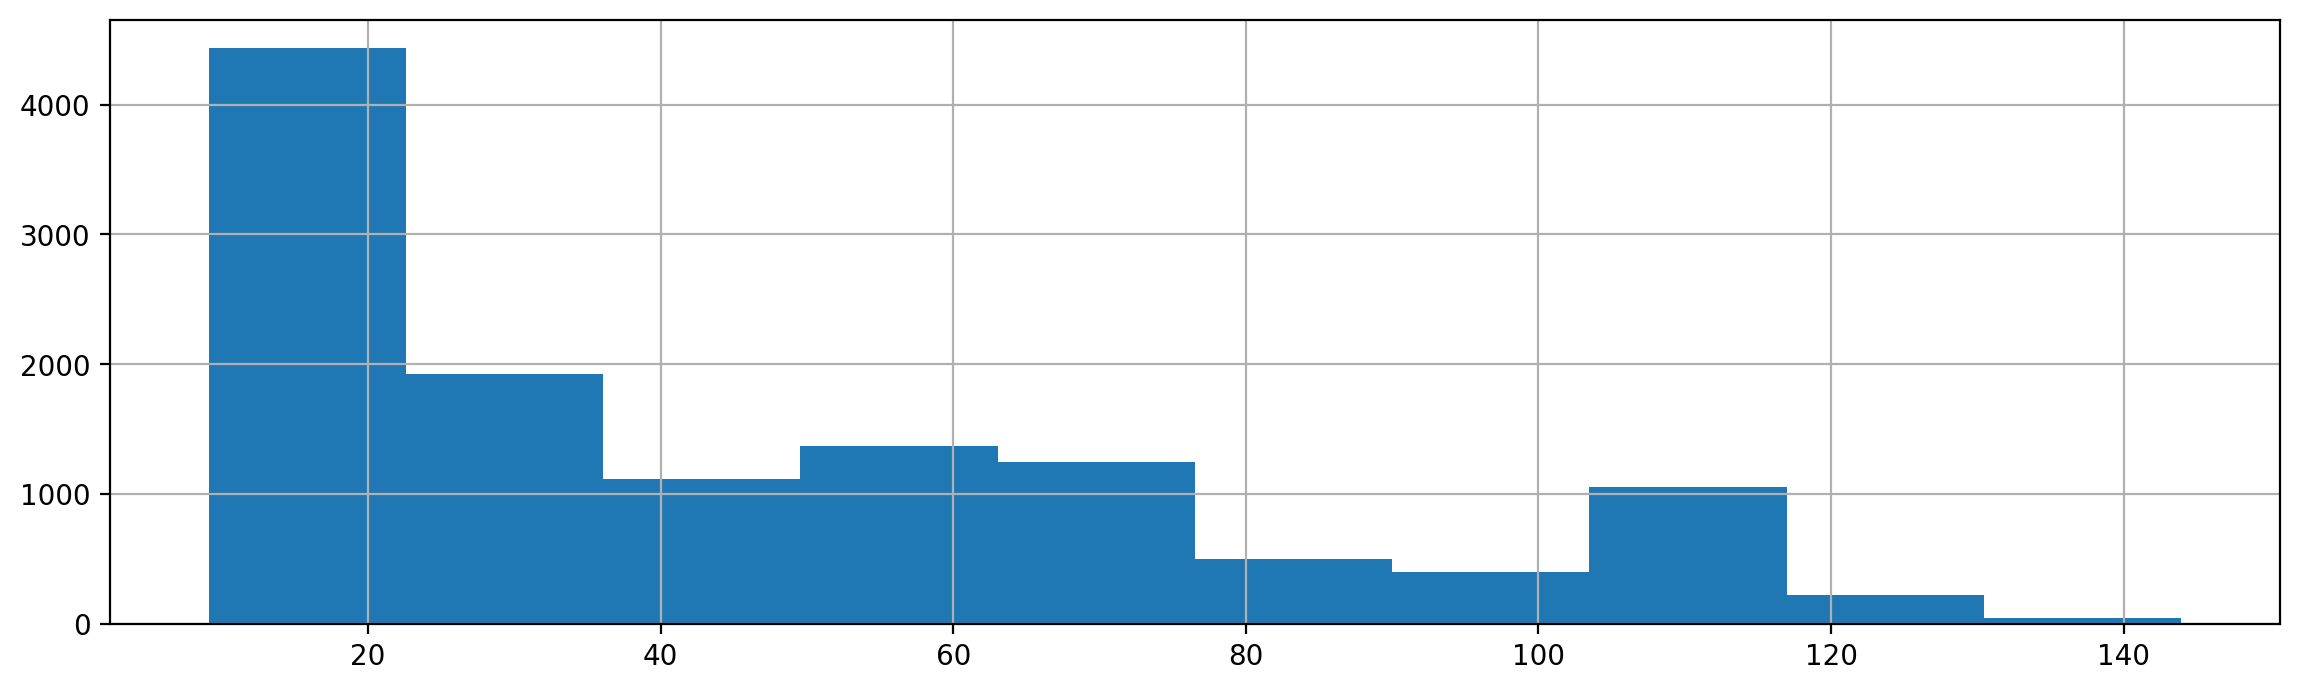

In [6]:
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
plt.figure()
hist = df['price'].hist()
plt.show()

Running the example shows that indeed the distribution of values does not look like a Gaussian, therefore the mean and variance values are less meaningful.

__This squashed distribution of the observations may be another indicator of a non-stationary time series.__

Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing.

This may suggest an exponential growth from season to season. A log transform can be used to flatten out exponential change back to a linear relationship.

Below is the same histogram with a log transform of the time series. Running the example, we cannot see the familiar Gaussian-like or Uniform-like distribution of values... 

<font color=red>__In the next section, we will use a statistical test designed to explicitly comment on whether a univariate time series is stationary.__</font>

(array([ 186.,  884., 3086., 1196., 1004.,  922., 1547., 1592., 1003.,
         871.]),
 array([2.20827441, 2.48439357, 2.76051273, 3.03663189, 3.31275105,
        3.58887022, 3.86498938, 4.14110854, 4.4172277 , 4.69334686,
        4.96946602]),
 <a list of 10 Patch objects>)

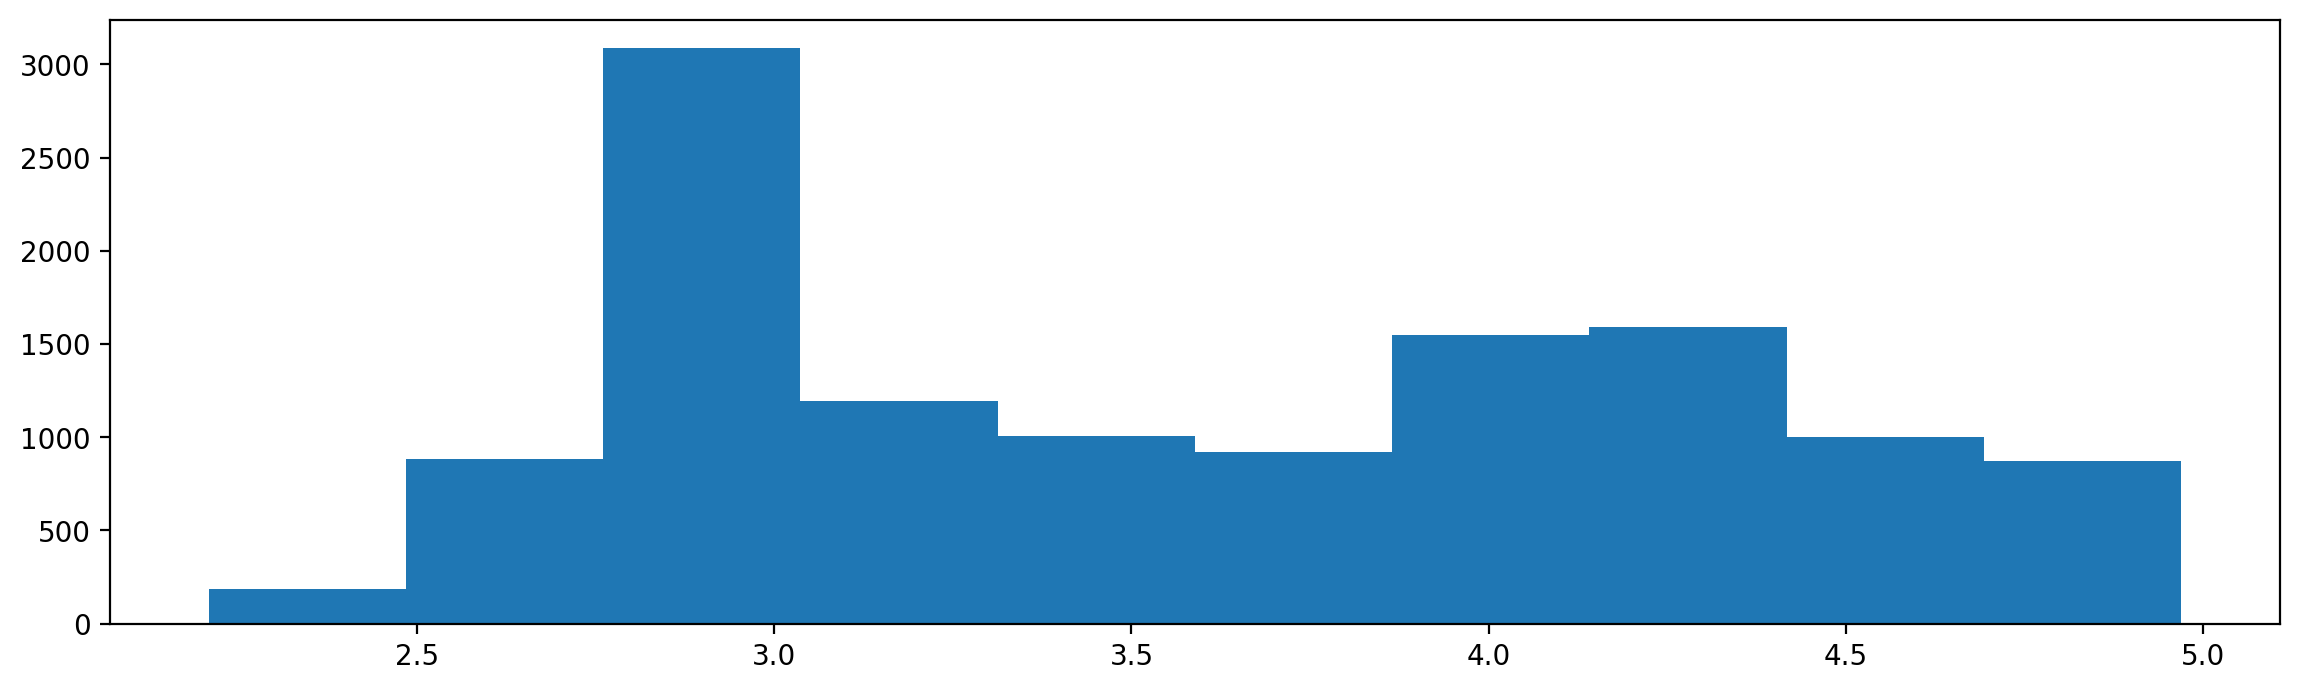

In [7]:
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
plt.figure()
log_hist = np.log( df['price'] ) 
plt.hist(log_hist)

# Augmented Dickey-Fuller test
<font color=blue>__The Augmented Dickey-Fuller test is a type of statistical test called a <font color=green>unit root test.</font>__</font>

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

 - __H0__ (Null Hypothesis): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
 - __H1__ (Altenative Hypothesis): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the __p-value__ from the test. A p-value below a significance level (such as $\alpha = $5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).
 - __p-value > 0.05__: Fail to reject H0, the data has a unit root and is non-stationary.
 - __p-value <= 0.05__: Reject H0, the data does not have a unit root and is stationary.

***
The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence $\alpha$.

<font color=green>In statistics, a unit root test tests whether a time series variable is non-stationary and possesses a unit root. The null hypothesis is generally defined as the presence of a unit root and the alternative hypothesis is either stationarity, trend stationarity or explosive root depending on the test used.</font>



In [8]:
"""======================="""
""" STATIONARITY TEST     """
"""======================="""
## Make a series to run the test on
table_daily_prices = pd.Series(data=df['price'].to_numpy(), index=df['date'])
table_daily_prices.describe()

count   12291.00
mean       46.45
std        32.31
min         9.10
25%        18.83
50%        33.20
75%        66.59
max       143.95
dtype: float64

In [9]:
## Run the Augmented Dickey-Fuller test
result = adfuller( table_daily_prices )
print('ADF Statistic: %.4f' % result[0])
print('\np-value: %.4f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
    print('%s: %.2f' % (key, value))

## Print the result    
pvalue = result[1]
alpha  = 0.05
#print("\nalpha: %d%%"%(alpha*100))
print("\nalpha: %.2f"%(alpha))
if pvalue>alpha:
    print("NON-STATIONARY series")
elif pvalue<=alpha:
    print("STATIONARY series")

ADF Statistic: -2.0457

p-value: 0.2669

Critical Values:
1%: -3.43
5%: -2.86
10%: -2.57

alpha: 0.05
NON-STATIONARY series


Here, our ADF statistic is not that negative. We can see that our ADF statistic is larger than all three critical values at 1%, 5% and 10%. 

This suggests that __we fail to reject H0__ with a significance level of more than 10%. This means that the result is a non-stationary time series. This means that there is a unit root and is dependent on time.

<br>

## Let's try to make a stationary series
Remember earlier, we mentioned that maybe the best way to make a stationary time series is to use the price change from day to day. Let's implement it below:

In [10]:
## FIRST ORDER DIFFERENCING
## Daily returns
daily_series_diff1 = table_daily_prices.diff(periods=1).dropna()
daily_series_diff1.head()

date
1987-05-21   -0.18
1987-05-22    0.10
1987-05-23    0.00
1987-05-24    0.00
1987-05-25    0.05
dtype: float64

In [11]:
## SECOND ORDER DIFFERENCING
## Differences in returns
daily_series_diff2 = daily_series_diff1.diff(periods=1).dropna()
## Make sure to drop the NaNs (not a numbers) because
## they will cause issues later when we design our model and 
## perform our forecasts.
daily_series_diff2.head()

date
1987-05-22    0.28
1987-05-23   -0.10
1987-05-24    0.00
1987-05-25    0.05
1987-05-26   -0.02
dtype: float64

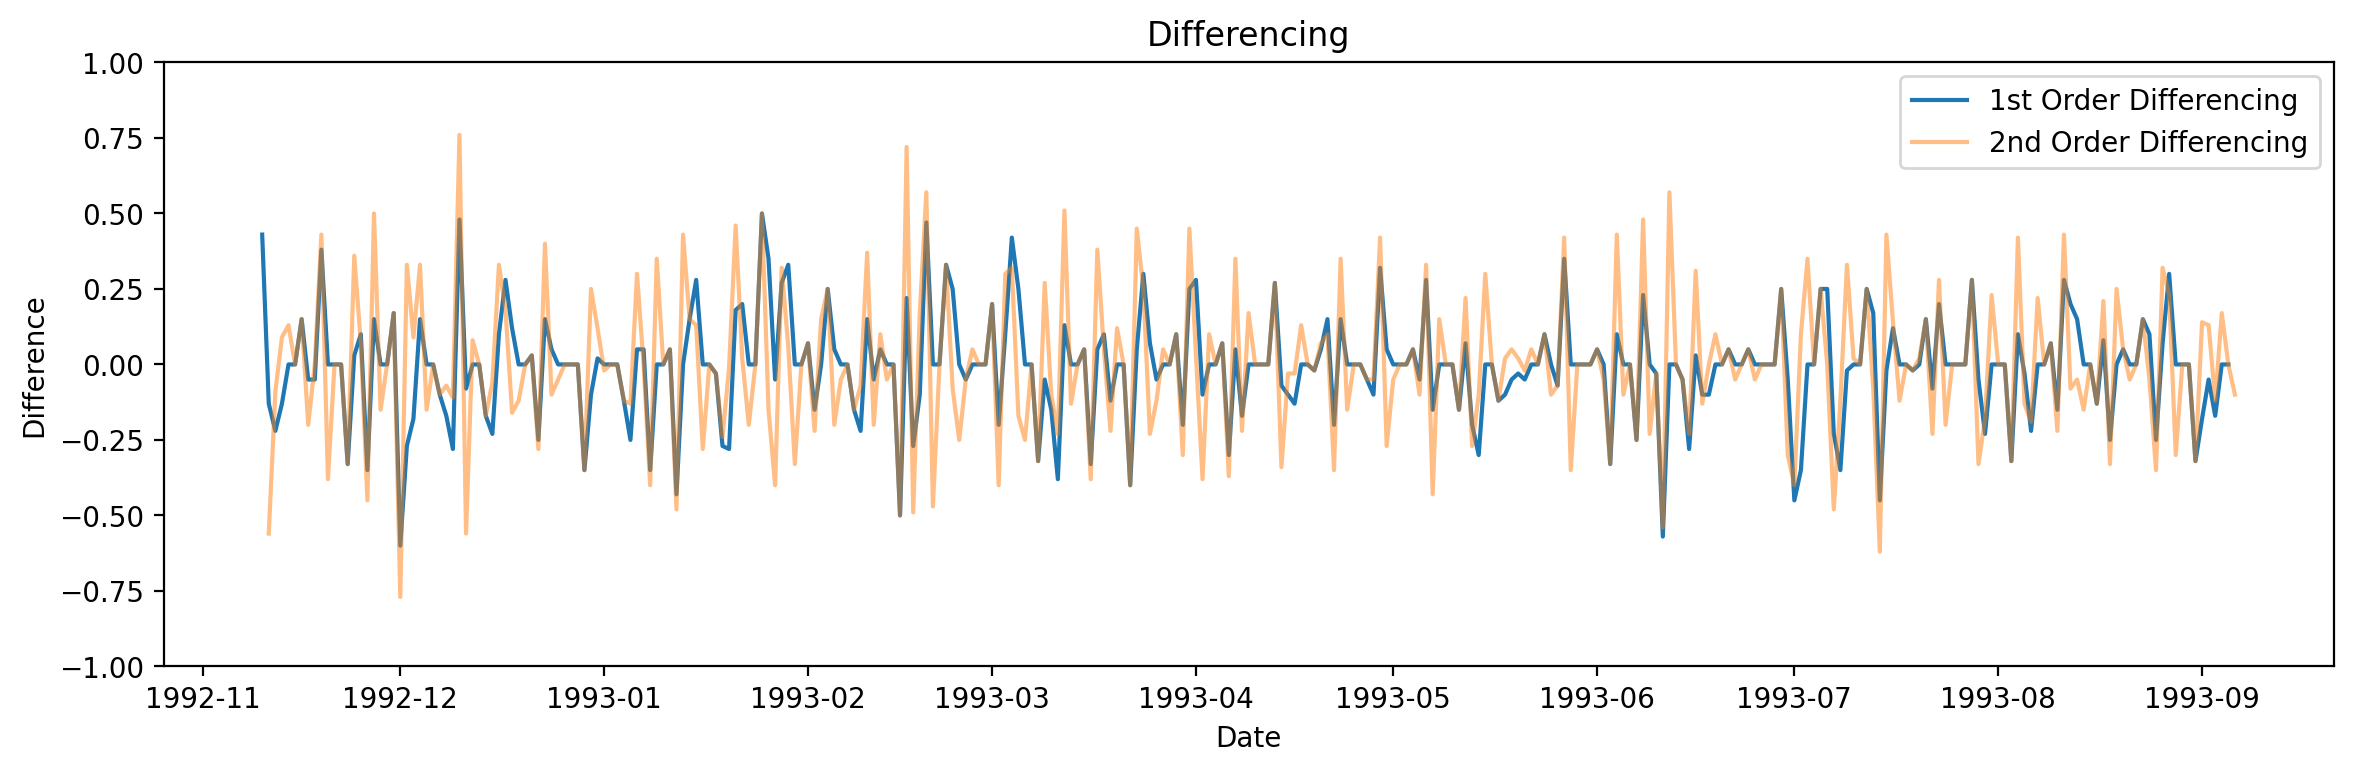

In [12]:
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
fig, ax = plt.subplots()
ax.plot(daily_series_diff1[2000:2300], label='1st Order Differencing', alpha=1.0)
ax.plot(daily_series_diff2[2000:2300], label='2nd Order Differencing', alpha=0.5)
plt.ylim([-1,1])

legend = ax.legend(loc='upper right')
plt.title('Differencing')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

The entire point of differencing is to make the time series stationary, and the difference is measured between today and yesterday until we reach a point where the statistical properties are constant over time.

Here, we can see that when we use a differencing method, the time series starts to look more like a stationary time series. Let's re-run the Augmented Dickey-Fuller test on the differencing time series.

In [13]:
## Run the Augmented Dickey-Fuller test
result = adfuller( daily_series_diff1 )
print('ADF Statistic: %.4f' % result[0])
print('\np-value: %.4f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
    print('%s: %.2f' % (key, value))

## Print the result    
pvalue = result[1]
alpha  = 0.05
#print("\nalpha: %d%%"%(alpha*100))
print("\nalpha: %.2f"%(alpha))
if pvalue>alpha:
    print("NON-STATIONARY series")
elif pvalue<=alpha:
    print("STATIONARY series")

ADF Statistic: -15.2702

p-value: 0.0000

Critical Values:
1%: -3.43
5%: -2.86
10%: -2.57

alpha: 0.05
STATIONARY series


In [14]:
## Run the Augmented Dickey-Fuller test
result = adfuller( daily_series_diff2 )
print('ADF Statistic: %.4f' % result[0])
print('\np-value: %.4f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
    print('%s: %.2f' % (key, value))

## Print the result    
pvalue = result[1]
alpha  = 0.05
#print("\nalpha: %d%%"%(alpha*100))
print("\nalpha: %.2f"%(alpha))
if pvalue>alpha:
    print("NON-STATIONARY series")
elif pvalue<=alpha:
    print("STATIONARY series")

ADF Statistic: -30.2107

p-value: 0.0000

Critical Values:
1%: -3.43
5%: -2.86
10%: -2.57

alpha: 0.05
STATIONARY series


# Other statistical tests
There are other statistical tests we can run. 

<br> </br>
Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test:

https://en.wikipedia.org/wiki/KPSS_test

<br> </br>
Phillips–Perron (PP) test:

https://en.wikipedia.org/wiki/Phillips%E2%80%93Perron_test

<br> </br>
The following code is used to test the number of differences required to fail to reject the null hypothesis. 

In [15]:
## Number of differences required for a stationary series

## augmented Dickey–Fuller test (adf test)
print(" ADF Test: ",ndiffs(table_daily_prices, test='adf'))

## Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test
print("KPSS Test: ",ndiffs(table_daily_prices, test='kpss'))

## Phillips–Perron (PP) test:
print("  PP Test: ",ndiffs(table_daily_prices, test='pp'))

 ADF Test:  1
KPSS Test:  1
  PP Test:  1


According to these tests, a first differencing method should be sufficient to confirming a stationary time series. 
***

# ACF and PACF plots
After a time series has been stationarized by differencing, the next step in fitting an <font color=blue> autoregressive integrated moving average (__ARIMA__) model </font> model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. 

We can do this by looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series. You can tentatively identify the numbers of AR and/or MA terms that are needed. 

The ACF plot is merely a bar chart of the coefficients of correlation between a time series and lags of itself. The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself. 

In general, __the "*partial*" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables__. For example, if we are regressing a variable $Y$ on other variables $X_1$, $X_2$, and $X_3$, the partial correlation between $Y$ and $X_3$ is the amount of correlation between $Y$ and $X_3$ that is not explained by their common correlations with $X_1$ and $X_2$. This partial correlation can be computed as the square root of the reduction in variance that is achieved by adding $X_3$ to the regression of $Y$ on $X_1$ and $X_2$.

__A partial autocorrelation is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags__. The autocorrelation of a time series Y at lag 1 is the coefficient of correlation between $Y_t$ and $Y_{t-1}$, which is presumably also the correlation between $Y_{t-1}$ and $Y_{t-2}$. But if $Y_t$ is correlated with $Y_{t-1}$, and $Y_{t-1}$ is equally correlated with $Y_{t-2}$, then we should also expect to find correlation between $Y_t$ and $Y_{t-2}$. In fact, the amount of correlation we should expect at lag 2 is precisely the square of the lag-1 correlation. Thus, the correlation at lag 1 "propagates" to lag 2 and presumably to higher-order lags. The partial autocorrelation at lag 2 is therefore the difference between the actual correlation at lag 2 and the expected correlation due to the propagation of correlation at lag 1.

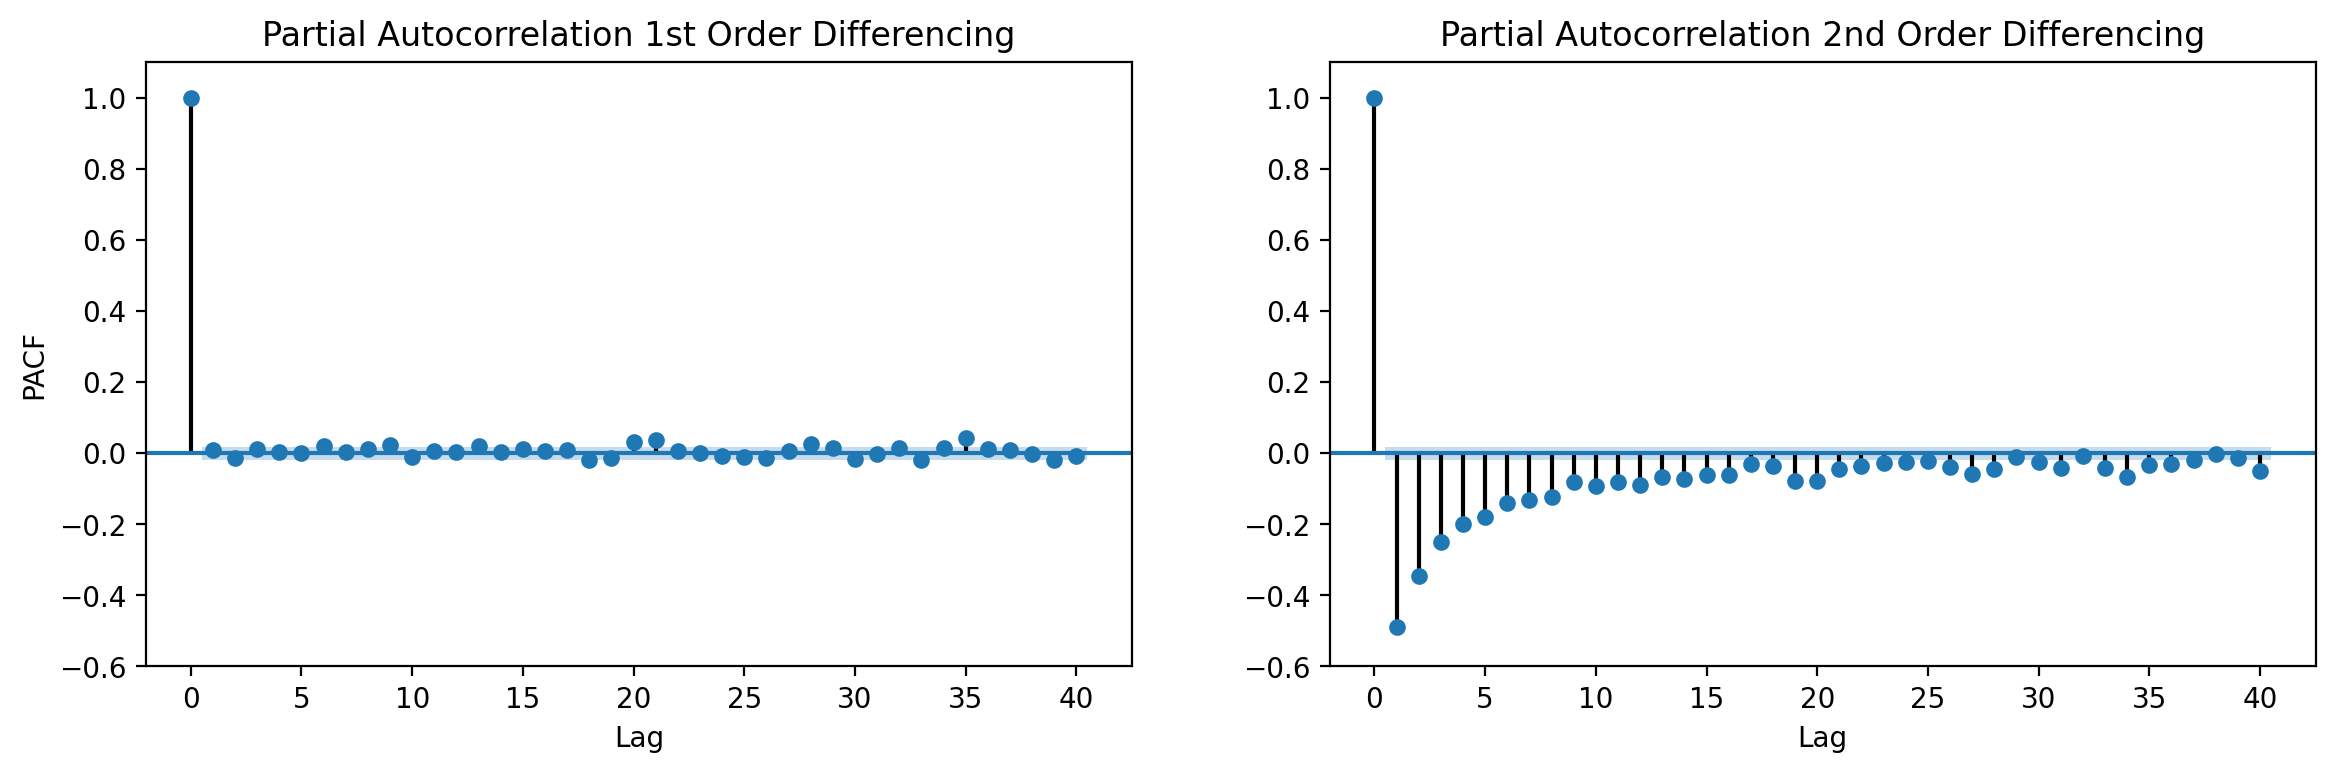

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
fig, axes = plt.subplots(1, 2, sharex=True)
num_lag = 40

plot_pacf(daily_series_diff1, lags=num_lag, ax=axes[0], title="Partial Autocorrelation 1st Order Differencing")
plot_pacf(daily_series_diff2, lags=num_lag, ax=axes[1], title="Partial Autocorrelation 2nd Order Differencing")

## Make it look pretty
axes[0].set_ylabel('PACF')
axes[0].set_xlabel('Lag')
axes[1].set_xlabel('Lag')
axes[0].set_ylim([-.6,1.1])
axes[1].set_ylim([-.6,1.1])

plt.show()

Note that the PACF plots have a significant positive spike at lag 1, meaning that all the higher-order autocorrelations are effectively explained by the lag-1 autocorrelation.

The partial autocorrelations at all lags can be computed by fitting a succession of autoregressive models with increasing numbers of lags. In particular, the partial autocorrelation at lag k is equal to the estimated AR(k) coefficient in an autoregressive model with k terms--i.e., a multiple regression model in which Y is regressed on LAG(Y,1), LAG(Y,2), etc., up to LAG(Y,k). Thus, by mere inspection of the PACF you can determine how many AR terms you need to use to explain the autocorrelation pattern in a time series: if the partial autocorrelation is significant at lag k and not significant at any higher order lags--i.e., if the PACF "cuts off" at lag k--then this suggests that you should try fitting an autoregressive model of order k

The PACF of the UNITS series provides an extreme example of the cut-off phenomenon: it has a very large spike at lag 1 and no other significant spikes, indicating that in the absence of differencing an AR(1) model should be used. However, the AR(1) term in this model will turn out to be equivalent to a first difference, because the estimated AR(1) coefficient (which is the height of the PACF spike at lag 1) will be almost exactly equal to 1. Now, the forecasting equation for an AR(1) model for a series Y with no orders of differencing is:

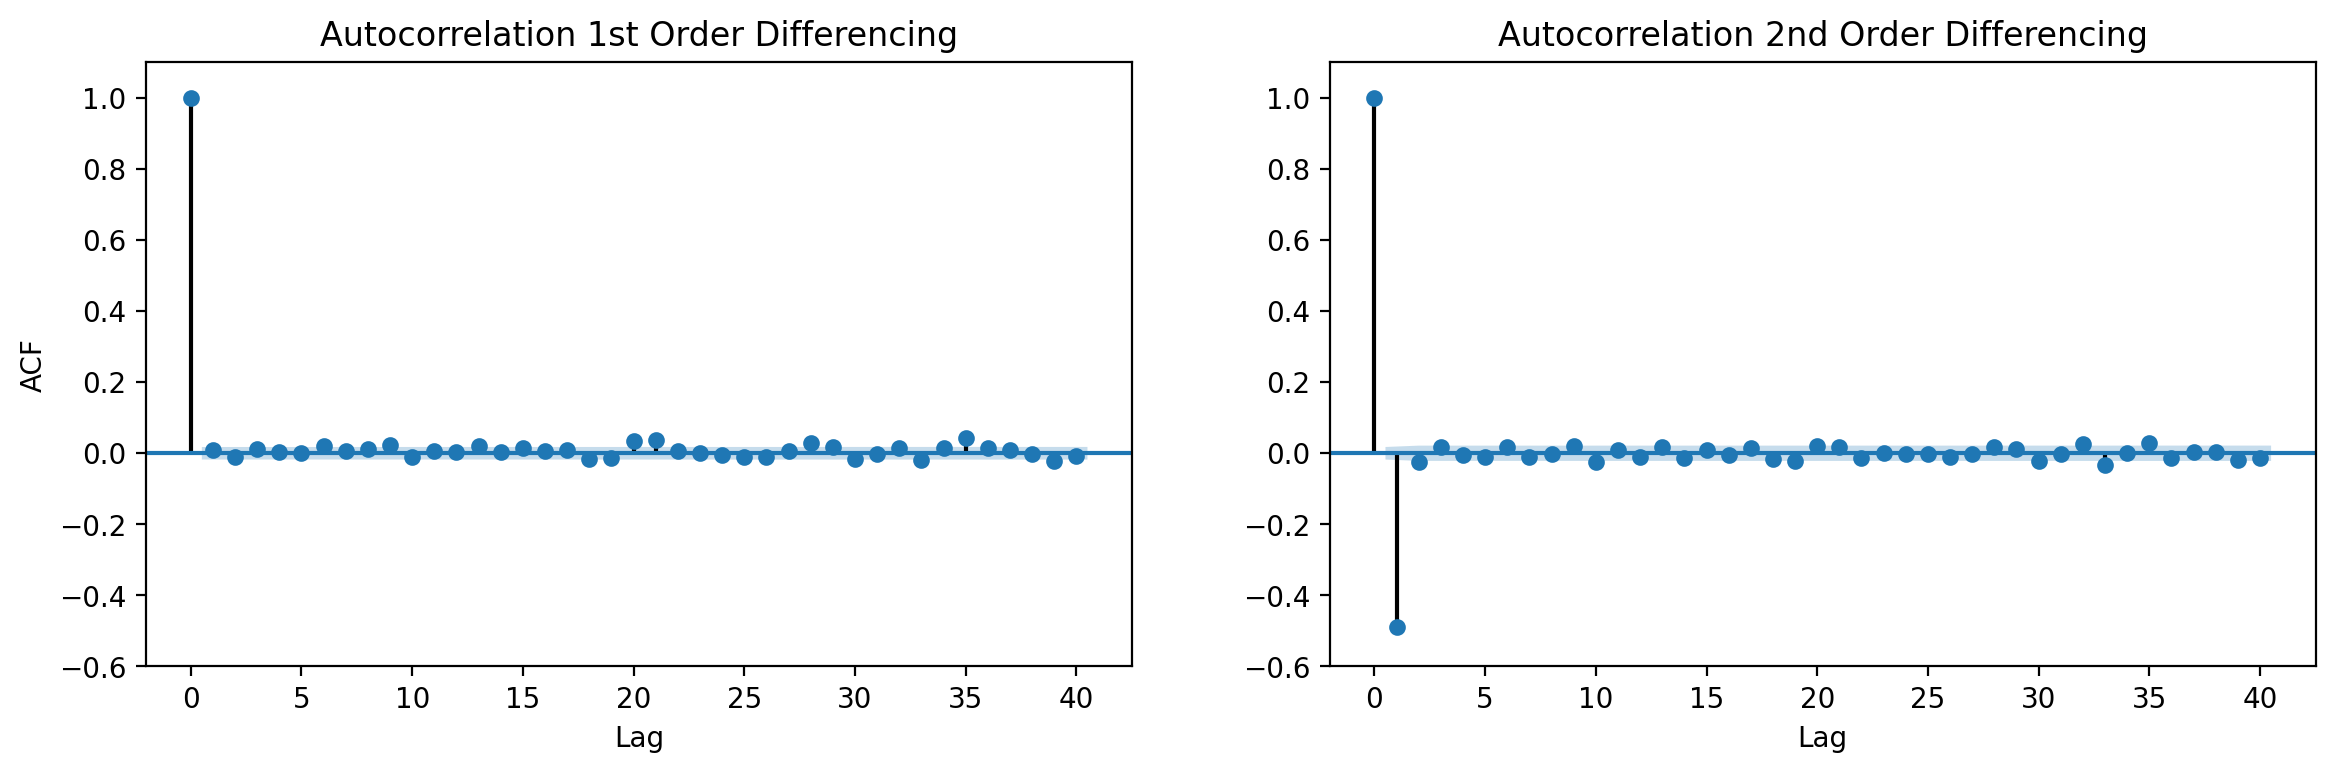

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(fig_width,fig_height), 'figure.dpi':200})
fig, axes = plt.subplots(1, 2, sharex=True)
num_lag = 40

plot_acf(daily_series_diff1, lags=num_lag, ax=axes[0], title="Autocorrelation 1st Order Differencing")
plot_acf(daily_series_diff2, lags=num_lag, ax=axes[1], title="Autocorrelation 2nd Order Differencing")

## Make it look pretty
axes[0].set_ylabel('ACF')
axes[0].set_xlabel('Lag')
axes[1].set_xlabel('Lag')
axes[0].set_ylim([-.6,1.1])
axes[1].set_ylim([-.6,1.1])

plt.show()

# Time for the Machine to Learn


In [18]:
import pmdarima as pm
model = pm.auto_arima(table_daily_prices, 
                      start_p=1, 
                      start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3,          # maximum p 
                      max_q=3,          # maximum q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32721.430, Time=2.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32720.675, Time=1.43 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32721.472, Time=0.57 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32721.442, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32718.802, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.611 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                12291
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -16358.401
Date:                Sun, 17 Jan 2021   AIC                          32718.802
Time:                        22:17:35   BIC                          32726.219
Sample:                             0   HQIC                         32721.287
                              - 12291                                  

In [19]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(table_daily_prices, order=(1, 0, 1)).fit(transparams=False)
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                12291
Model:                     ARMA(1, 1)   Log Likelihood              -16361.259
Method:                       css-mle   S.D. of innovations                nan
Date:                Sun, 17 Jan 2021   AIC                          32730.518
Time:                        22:17:37   BIC                          32760.185
Sample:                    05-20-1987   HQIC                         32740.458
                         - 01-11-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.1770     18.440      2.884      0.004      17.036      89.318
ar.L1.y        0.9996      0.000   3770.723      0.000       0.999       1.000
ma.L1.y        0.0103      0.009      1.133      0.2

In [20]:
ARIMA_Predict = model.predict(start='4/17/2020', end='4/17/2021')

In [21]:
ARIMA_Predict

2020-04-17   18.69
2020-04-18   19.78
2020-04-19   19.76
2020-04-20   19.76
2020-04-21   17.35
              ... 
2021-04-13   54.77
2021-04-14   54.77
2021-04-15   54.77
2021-04-16   54.77
2021-04-17   54.76
Freq: D, Length: 366, dtype: float64

In [22]:
prediction = pd.DataFrame(ARIMA_Predict, columns=['predictions']).to_csv('prediction.csv')

In [23]:
train = df[(df['date' ] > '2000-01-01') & (df['date' ] <= '2020-04-16')]
test = df[df['date' ] >= '2020-04-17']

In [24]:
from fbprophet import Prophet
d={'ds':train['date'],'y':train['price']}
df_pred=pd.DataFrame(data=d)
model = Prophet(daily_seasonality=False)
model.fit(df_pred)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


<Figure size 3600x1200 with 0 Axes>

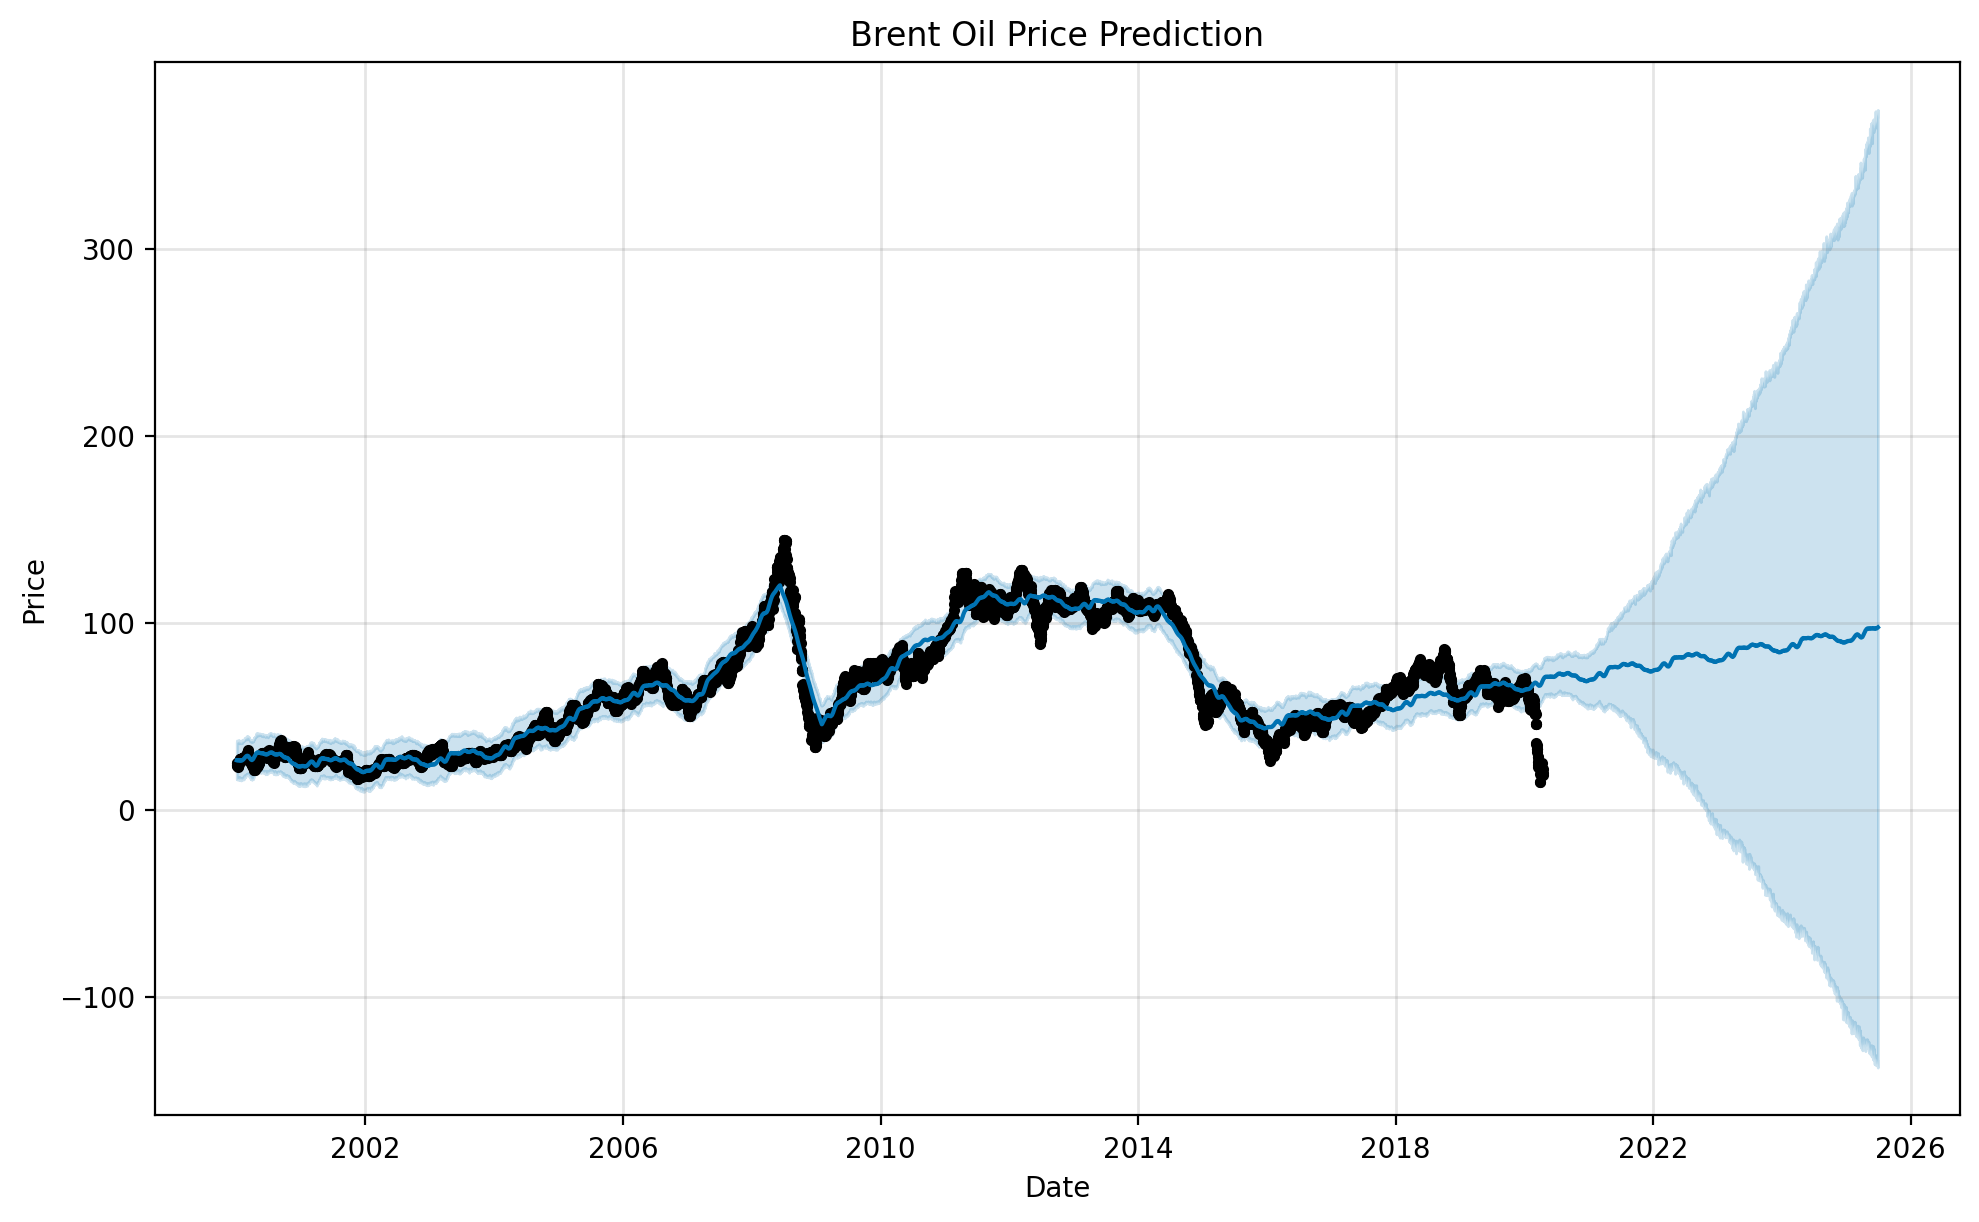

In [25]:
future = model.make_future_dataframe(periods=1900)
forecast = model.predict(future)
plt.figure(figsize=(18, 6))
model.plot(forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('Brent Oil Price Prediction');

In [26]:
forecast2019 = forecast[(forecast['ds' ] >= '2020-04-17') & (forecast['ds' ] <= '2020-09-30')] 

In [27]:
print(len(forecast2019['ds']))
print(len(ARIMA_Predict))

167
366


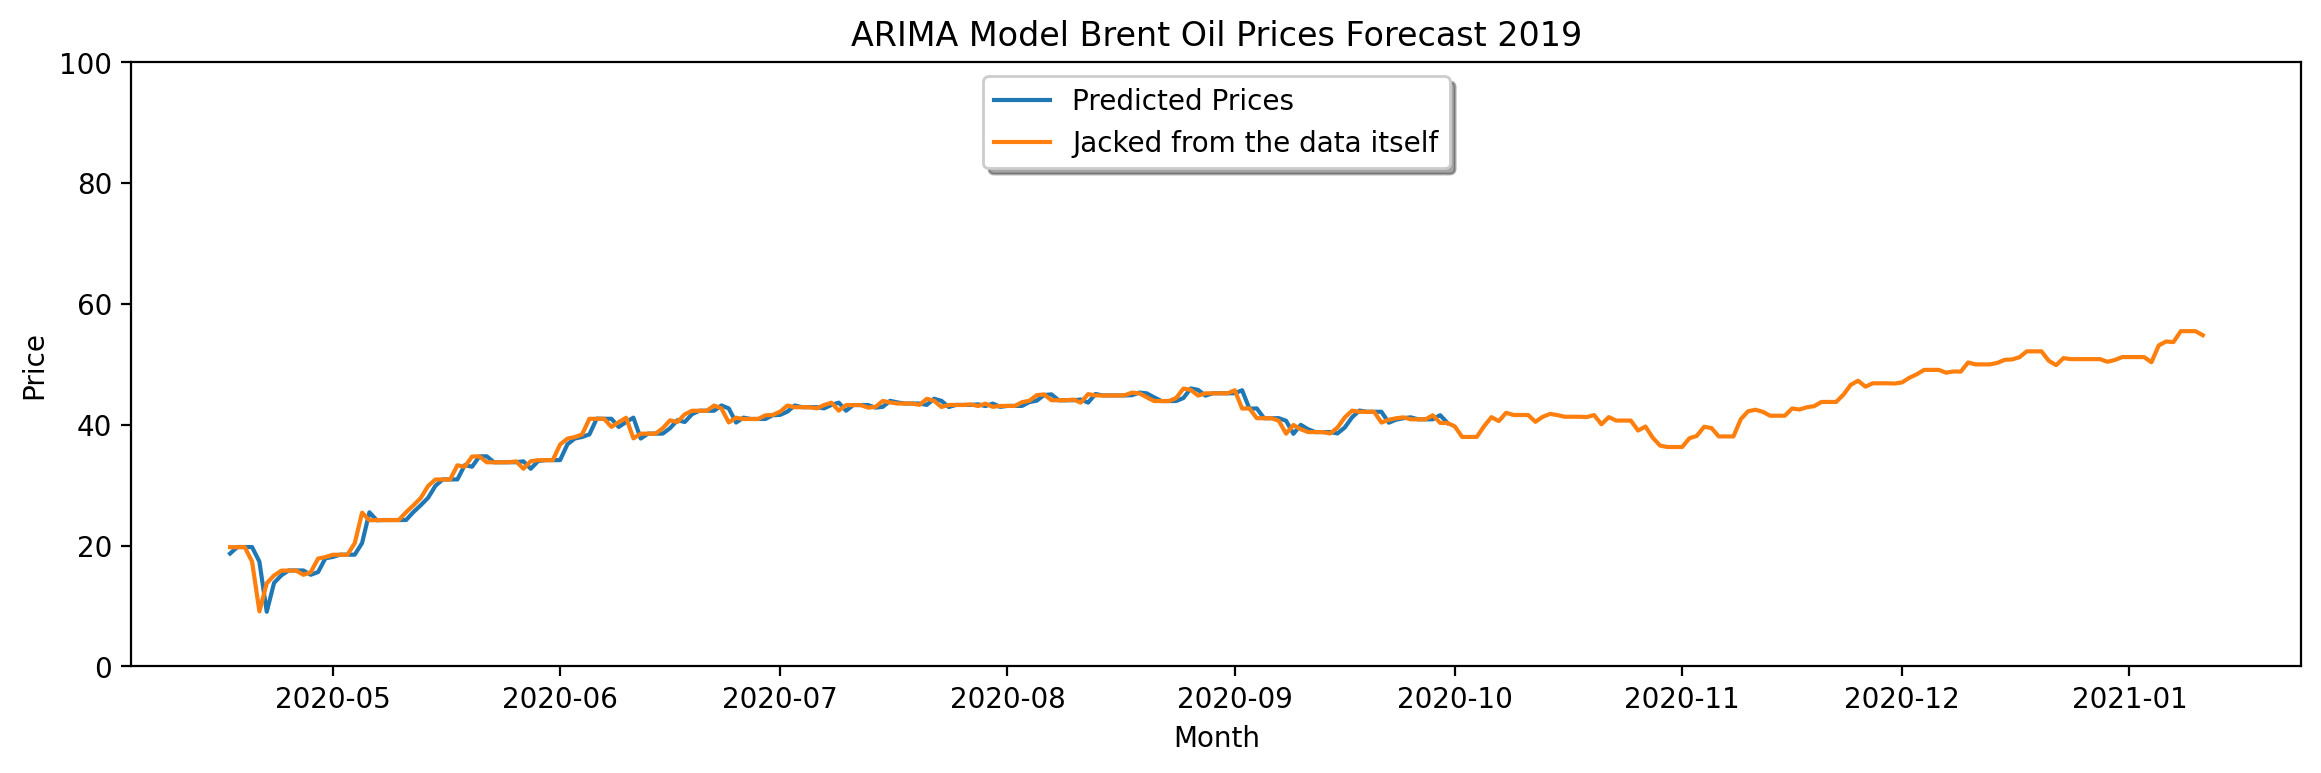

In [28]:
fig, ax = plt.subplots()
ax.plot(forecast2019['ds'], ARIMA_Predict[0:167], label='Predicted Prices')
ax.plot(test['date'], test['price'], label='Jacked from the data itself')
plt.ylim([0,100])
legend = ax.legend(loc='upper center', shadow=True)
plt.title('ARIMA Model Brent Oil Prices Forecast 2019')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()